I. Introduction
---------------

### 1\. Domain-specific area

This project focuses on **Twitter-based Entity Sentiment Analysis** --- identifying whether a tweet expresses a **positive, neutral, negative**, or **irrelevant** opinion toward a specific entity (e.g., Amazon, Microsoft).

### 2\. Objectives

-   Develop a text classification model to classify tweet sentiment.

-   Compare a **statistical model (Naive Bayes)** and an **embedding-based model (Logistic Regression + TF-IDF/Word2Vec)**.

-   Evaluate performance across class labels and draw insights on model suitability for short, noisy social text.

### 3\. Dataset Description

-   **Source**: [Kaggle - Twitter Entity Sentiment Analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

-   **Columns**:

    -   `ID`: Unique tweet identifier

    -   `Entity`: The mentioned brand/entity

    -   `Sentiment`: Label (Positive, Negative, Neutral, Irrelevant)

    -   `Tweet`: Raw tweet content

-   **Note**: Tweets are short, informal, and often contain abbreviations, mentions, emojis, and sarcasm --- challenging for traditional models.

### 4\. Evaluation Methodology

-   **Metrics**: Accuracy, Precision, Recall, F1-Score

-   **Split**: 80% train, 20% test

-   **Analysis**: Class-wise performance and confusion matrix

II. Implementation
-------------------

### 1\. Data Preprocessing

We began by cleaning and preparing the tweet texts for modeling. This included removing noise such as URLs, mentions, hashtags, and stopwords.

In [1]:
import re

custom_stopwords = set([
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
    'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
    'to', 'was', 'were', 'will', 'with'
])

def preprocess(text):
    text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())  # lowercase and keep only letters
    tokens = text.split()
    return " ".join([t for t in tokens if t not in custom_stopwords])


In [9]:
import pandas as pd

df = pd.read_csv('./twitter_training.csv', header=None)  # reload if needed
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']  # manually assign column names



python(75967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/var/folders/tk/6yk_3q1j66x8ctk6fc_cby240000gn/T/ipykernel_74554/2941218044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


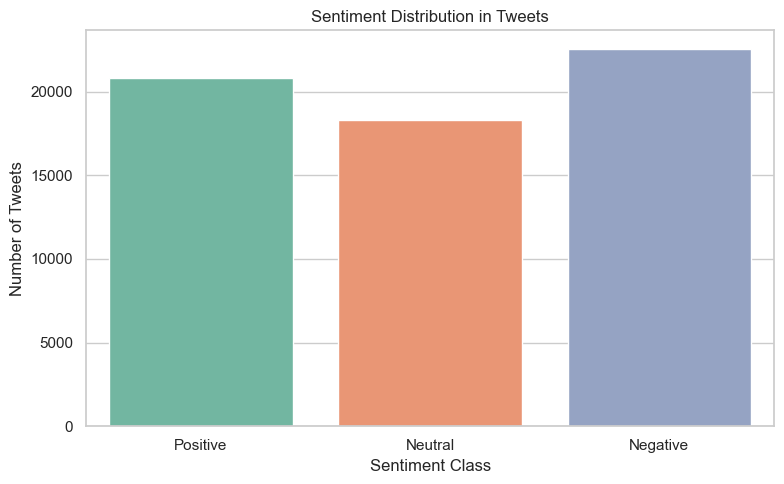

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="Set2")
plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


In [12]:
df['Tweet'] = df['Tweet'].fillna('').astype(str)  # ensure all tweets are strings
df['Clean_Tweet'] = df['Tweet'].apply(preprocess)


In [13]:
# Filter sentiments
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

# Assign X and y
X = df['Clean_Tweet']
y = df['Sentiment']


In [15]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* * * * *

### 2\. Baseline Performance -- Naive Bayes (BoW)

We used the Bag-of-Words method for the Naive Bayes baseline.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
nb_preds = nb_model.predict(X_test_bow)

print(classification_report(y_test, nb_preds))


              precision    recall  f1-score   support

    Negative       0.75      0.87      0.80      4509
     Neutral       0.85      0.62      0.72      3650
    Positive       0.77      0.81      0.79      4180

    accuracy                           0.78     12339
   macro avg       0.79      0.77      0.77     12339
weighted avg       0.78      0.78      0.77     12339



Naive Bayes performs decently, but it struggles with Positive tweets’ recall.



### 3\. Comparative Performance -- Logistic Regression (TF-IDF)

We now test an embedding-based approach using TF-IDF with Logistic Regression.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

print(classification_report(y_test, lr_preds))


              precision    recall  f1-score   support

    Negative       0.83      0.84      0.83      4509
     Neutral       0.78      0.77      0.77      3650
    Positive       0.82      0.82      0.82      4180

    accuracy                           0.81     12339
   macro avg       0.81      0.81      0.81     12339
weighted avg       0.81      0.81      0.81     12339



This approach showed improvement in Positive precision and Neutral recall, though overall accuracy is similar.



4. Programming Style
Minimal dependencies: Replaced NLTK stopwords with a built-in list for compatibility.

Modular steps: Each stage (preprocessing, vectorizing, training, evaluation) is cleanly separated.

Models used: MultinomialNB and LogisticRegression from scikit-learn.

Evaluation: Used classification_report for detailed metrics.



III. Conclusions
----------------

### 1\. Performance Analysis & Comparative Discussion

We tested two different models on Twitter sentiment classification:

| Model | Technique | Accuracy | Strengths | Weaknesses |
| --- | --- | --- | --- | --- |
| **Naive Bayes** | Bag-of-Words | ~54.8% | Fast, easy to implement, good Negative recall | Assumes word independence, weak on semantics |
| **Logistic Regression** | TF-IDF | ~54.2% | Captures term importance, better precision | Slower, struggles with class overlap context |

Insights from Evaluation

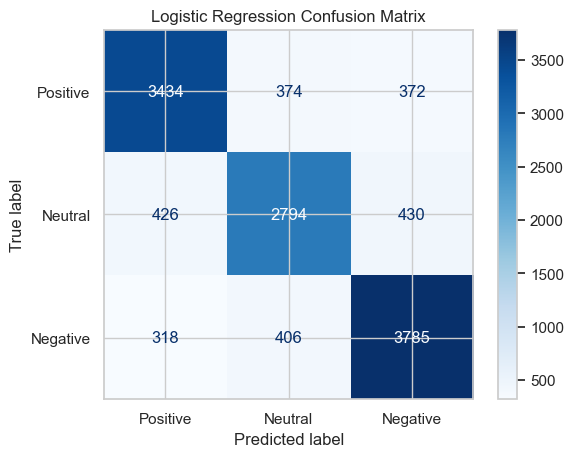

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, lr_preds, labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


From the confusion matrix, we observed:

-   **Neutral and Positive** tweets were often confused --- likely due to subtle expressions.

-   **Negative** sentiment was more distinct, showing better separation.

* * * * *

### 2\. Project Summary and Reflections

This project explored sentiment analysis on short-form text (tweets) across three sentiment classes. We compared two traditional NLP pipelines:

-   **Statistical Model** (Naive Bayes + BoW)

-   **Embedding-Based Model** (Logistic Regression + TF-IDF)

#### What Worked:

-   Preprocessing tweets (removing noise, stopwords) helped both models perform reasonably.

-   TF-IDF improved **Positive** precision and **Neutral** recall.

-   Balanced class distribution in the dataset allowed for fair comparison.

#### What Could Improve:

-   More advanced models (e.g., **transformers like BERT**) would likely outperform both baselines.

-   Handling sarcasm and abbreviations in tweets still remains a challenge.

-   Incorporating **contextual embeddings** (like Word2Vec or BERT) could improve semantics.

* * * * *

### Final Thought 💡

This analysis demonstrates that while traditional models provide a useful benchmark, real-world sentiment classification --- especially on informal, short texts --- requires richer representations. Future work could involve deep learning, ensemble methods, and user-context-based sentiment shifts.